### VGG16
In this code blocks I have used the pre-trained model of VGG16 for making the dog's breed prediction easy. VGG16 is a very powerful model with total of 16 deep layers of Network. Transfer Learning is uses the concept of implementing the pre-trained models for our own usages.

In [1]:
from keras.applications import vgg16

Using TensorFlow backend.


In [2]:
#### We are using imagenet as weights, it will download if u don't have by default.
model = vgg16.VGG16(weights='imagenet')

In [3]:
 model.layers[0].input # To check the input Shape used in this model

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [4]:
from keras.preprocessing import image
img = image.load_img("dog.jpg", target_size=(224,224))

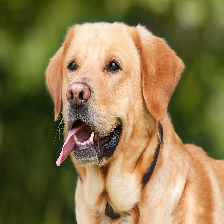

In [5]:
img

In [6]:
type(img) 

PIL.Image.Image

Since we are using a model which is already being created by someone, so we need specify the size of image that we are providing as per the size which was given while training the model. Now in CNN we cannot use Pillow datatype of an image for different manipulations, so we need to convert it into numpy array, as in down code blocks we did. Also CNN accepts 4 dimentional image so we need to convert it into 4D, as we did. In the down code blocks, decode_predictions will convert the predicted value into text value so that we can easily understand it.

In [7]:
img_np = image.img_to_array(img) #Convertion of image into numpy array

In [8]:
print(img_np.shape)
type(img_np)

(224, 224, 3)


numpy.ndarray

In [11]:
import numpy as np

In [14]:
img_converted = np.expand_dims(img_np, axis=0)
img_converted.shape

(1, 224, 224, 3)

In [16]:
from keras.applications.vgg16 import decode_predictions
pred = model.predict(img_converted)
pred

array([[3.50126284e-09, 3.73815245e-09, 4.21563495e-09, 2.29107022e-09,
        2.95755642e-09, 4.52026727e-09, 4.32260644e-10, 1.02772046e-09,
        2.83826584e-09, 3.14826470e-10, 6.32972164e-09, 4.21163282e-09,
        1.38768481e-08, 1.14175265e-08, 1.26384121e-08, 6.06934225e-10,
        1.75919612e-09, 2.00845962e-09, 1.56036695e-09, 4.45179138e-09,
        1.66525904e-09, 1.42707446e-09, 2.27823787e-08, 1.87591482e-07,
        3.58140801e-06, 3.73076592e-09, 7.39074357e-09, 1.08286544e-08,
        1.08938858e-09, 4.44469656e-10, 1.50985113e-10, 3.48414231e-09,
        7.63755947e-10, 4.99453590e-09, 8.05614153e-09, 5.89123195e-10,
        6.45104370e-09, 5.67166403e-09, 2.94606517e-09, 8.36823055e-09,
        1.34550344e-08, 7.97763411e-10, 1.06922093e-09, 8.36952374e-09,
        4.59054655e-10, 7.77383402e-09, 7.48180007e-09, 3.39294637e-08,
        7.54669429e-08, 2.60058142e-10, 4.06203160e-09, 2.04448316e-08,
        5.23346966e-09, 8.61964722e-10, 5.43763923e-10, 8.594218

In [18]:
decode_predictions(pred, top=3)[0]

[('n02099712', 'Labrador_retriever', 0.61871654),
 ('n02109047', 'Great_Dane', 0.124946564),
 ('n02099849', 'Chesapeake_Bay_retriever', 0.116344675)]